In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from CHAMP.DataLoader import LoadMNIST
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP, DisplayConvergenceClassif
#from CHAMP.CHAMP_Layer import CHAMP_Layer
from CHAMP.CHAMP_Layer import ConvMP
from CHAMP.DataTools import GenerateGabor, Rebuilt
import matplotlib.pyplot as plt
from CHAMP.Classif_Layer import Classif_Layer
import os
home = os.getenv('HOME')

# On MNIST DataBase

## Load the DataBase

In [33]:
path = "../../../Science/These/Rapport d'avancement/database/MNISTtorch/"
#path = home + "/science/VB_These/Rapport d'avancement/database/Face_DataBase/"
training_set,testing_set = LoadMNIST(60000,data_path=path)
training_set = (training_set[0][0].unsqueeze(0),training_set[0][1].unsqueeze(0))
testing_set = (testing_set[0][0].unsqueeze(0),testing_set[0][1].unsqueeze(0))

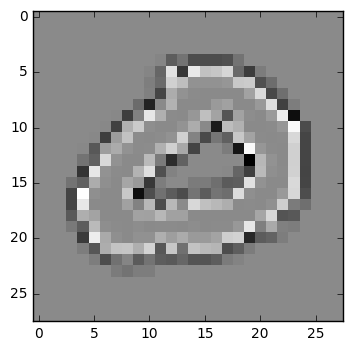

In [17]:
plot = plt.imshow(training_set[0][0,0,0,:,:].numpy(),cmap='gray')

## Generate Filters

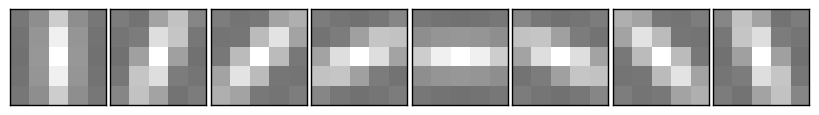

In [18]:
DicoGabor = GenerateGabor(nb_dico=8,dico_size=(5,5),sigma=1,lambd=5,gamma=0.5,psi=0)
DisplayDico(DicoGabor)

## Coding

In [19]:
code_training = ConvMP(image_input=training_set[0][0,:,:,:,:], dictionary=DicoGabor, l0_sparseness=100,
                modulation=None, verbose=0, train=True, doSym='pos', mask=None,\
                MaskMod='Residual')

In [21]:
reconstructed_image = Rebuilt(training_set[0][0,:,:,:,:],code_training,DicoGabor)

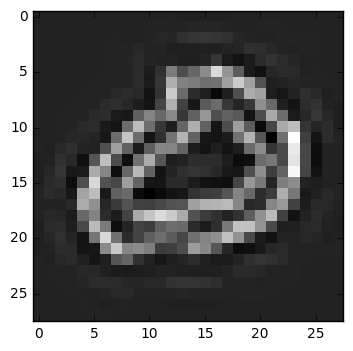

In [22]:
plt.imshow(reconstructed_image[0,0,:,:].numpy(),cmap='gray')

In [23]:
residual=training_set[0][0,:,:,:,:]-reconstructed_image

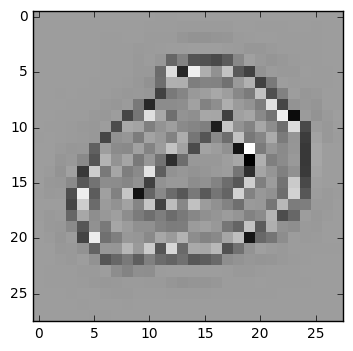

In [24]:
plt.imshow(residual[0,0,:,:].numpy(),cmap='gray')

In [25]:
code_testing = ConvMP(image_input=testing_set[0][0,:,:,:,:], dictionary=DicoGabor, l0_sparseness=100,
                modulation=None, verbose=0, train=True, doSym='pos', mask=None,\
                MaskMod='Residual')

## Classifying Row Data

In [46]:
from CHAMP.Classif_Layer import Classif_Layer
Classifier_Raw = Classif_Layer(nb_dico=1,size_image=(28,28),nb_categories=10, verbose=0)
a = Classifier_Raw.train_classif(training_set,nb_epoch=20000,data_test_loader=testing_set,lr=0.003)

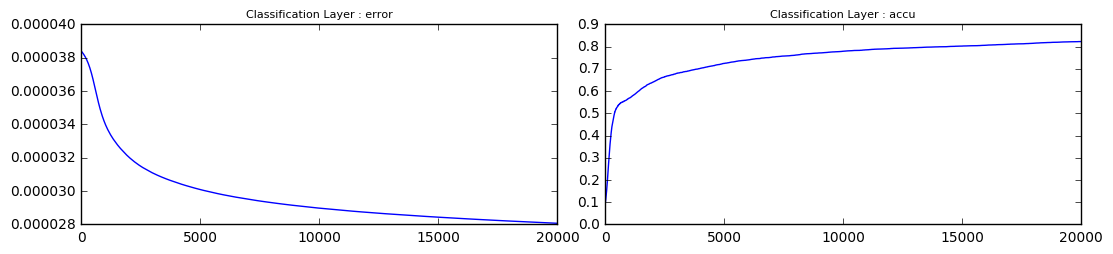

In [47]:
DisplayConvergenceClassif(Classifier_Raw, to_display=['error','accu'])

## Classifying Output of One CHAMP Layer

In [49]:
output_Layer1_training = (code_training.to_dense().unsqueeze(0),training_set[1])
output_Layer1_testing = (code_testing.to_dense().unsqueeze(0),testing_set[1])

In [53]:
print(output_Layer1_training[0].size())

torch.Size([1, 60000, 8, 24, 24])


In [62]:
from CHAMP.Classif_Layer import Classif_Layer
Classifier = Classif_Layer(nb_dico=8,size_image=(24,24),verbose=0,nb_categories=10)
b = Classifier.train_classif(output_Layer1_training,nb_epoch=10000,data_test_loader=output_Layer1_testing ,lr=0.001)

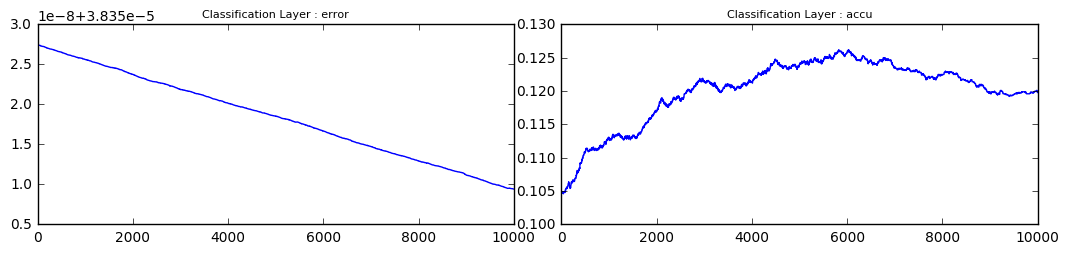

In [63]:
DisplayConvergenceClassif(Classifier, to_display=['error','accu'])

# On MNIST DataBase

In [ ]:
print(training_set[1])